In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
train  = pd.read_csv('rdkit_train.csv')
val  = pd.read_csv('rdkit_valid.csv')
test  = pd.read_csv('rdkit_test.csv')

ncol_train = train.shape[1]-1
x_train = train.iloc[:,0:ncol_train]
y_train= train['active']

ncol_val = val.shape[1]-1
x_val = val.iloc[:,0:ncol_val]
y_val= val['active']

ncol_test = test.shape[1]-1
x_test = test.iloc[:,0:ncol_test]
y_test= test['active']

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_val =  sc.transform(x_val)
x_test = sc.transform(x_test)

In [6]:
from supervised.automl import AutoML
automl = AutoML(mode="Compete")
automl.fit(x_train, y_train)

AutoML directory: AutoML_4
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.558852 trained in 0.63 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree logloss 0.434967 trained in 2.11 seconds
2_DecisionTree logloss 0.472829 trained in 2.39 seconds
3_DecisionTree logloss 0.47254

AutoML(mode='Compete')

In [7]:
# compute the accuracy on test data
from sklearn.metrics import accuracy_score
predictions = automl.predict_all(x_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

   prediction_0  prediction_1  label
0      0.910615      0.089385      0
1      0.128583      0.871417      1
2      0.850241      0.149759      0
3      0.126760      0.873240      1
4      0.131979      0.868021      1
Test accuracy: 0.8817733990147784


0.9353274789608489
0.938338844582766


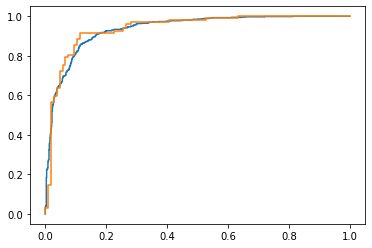

In [8]:
y_pred1 = automl.predict_all(x_train) 
y_pred2 = automl.predict_all(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, threshold1 = roc_curve(y_train, automl.predict_proba(x_train)[:, 1])
fpr2, tpr2, threshold2 = roc_curve(y_test, automl.predict_proba(x_test)[:, 1])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label="ROC Curve of train for mljar")
plt.plot(fpr2, tpr2, label="ROC Curve of test formljar")
auc1 = roc_auc_score(y_train, automl.predict_proba(x_train)[:, 1])
auc2 = roc_auc_score(y_test, automl.predict_proba(x_test)[:, 1])
print (auc1)
print (auc2)